<a href="https://colab.research.google.com/github/Deepanshi-Gupta/AMAZON_FOOD_REVIEW/blob/main/FOOD_REVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re

from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
from sklearn.naive_bayes import * 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, STOPWORDS

#Reading data

In [2]:
!gdown 1kcGlBIg5842GQpD8kyPvjFmS-uPqcbkC

Downloading...
From: https://drive.google.com/uc?id=1kcGlBIg5842GQpD8kyPvjFmS-uPqcbkC
To: /content/Reviews.csv
100% 301M/301M [00:03<00:00, 78.8MB/s]


In [3]:
df = pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
reviews = df.copy()

In [5]:
#display data
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
reviews["sentiment"] = reviews["Score"].apply(lambda score: "positive" if score > 3 else "negative")
reviews["usefulScore"] = (reviews["HelpfulnessNumerator"]/reviews["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "useless")
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,usefulScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,useless
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,useless


In [7]:
#Rows having overall score equal to 5
reviews[reviews.Score == 5].head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,usefulScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,useless
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,positive,useless
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,positive,useless
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,positive,useful


In [8]:
#Rows having overall score equal to 1
reviews[reviews.Score == 1].head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,usefulScore
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,useless
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,negative,useful
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",negative,useless
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",negative,useless
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,negative,useful


#Feature extraction from reviewsText
Assign new dimension to each word and give the word counts

In [9]:
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

reviews.dropna(inplace= True)
reviews["summaryClean"] = reviews["Summary"].apply(cleanReviews)

train, test = train_test_split(reviews, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

454728 items in training data, 113683 in test data


#Using TfidfTransformer().fit_transform
to fit the train and test data

In [10]:
countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()

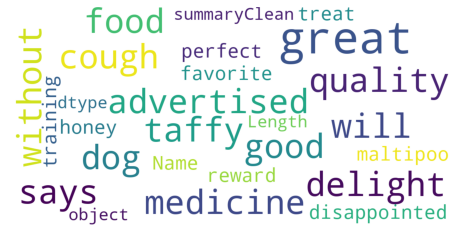

In [11]:
stopwords = set(STOPWORDS)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(reviews["summaryClean"])

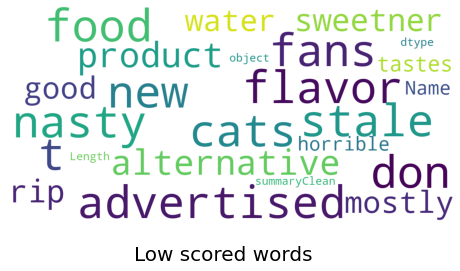

In [12]:
show_wordcloud(reviews[reviews.Score == 1]["summaryClean"], title = "Low scored words")

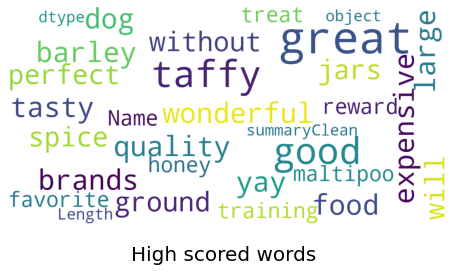

In [13]:
show_wordcloud(reviews[reviews.Score == 5]["summaryClean"], title = "High scored words")

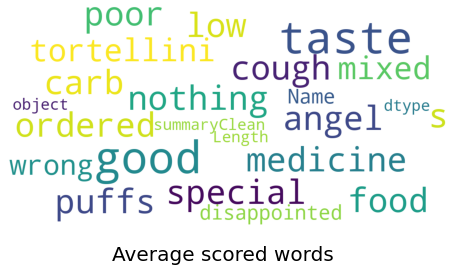

In [14]:
show_wordcloud(reviews[reviews.Score == 2]["summaryClean"], title = "Average scored words")

#Multinomial Naïve Bayes learning method


In [15]:
multiNB = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = multiNB.predict(X_test_tfidf)

#Bernoulli Naïve Bayes learning method

In [16]:
bernoNB = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = bernoNB.predict(X_test_tfidf)

#Logistic regression learning method

In [17]:
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
models = {'Logistic' : logreg, 'Multinomial':multiNB,'Bernoulli':bernoNB}

#Results

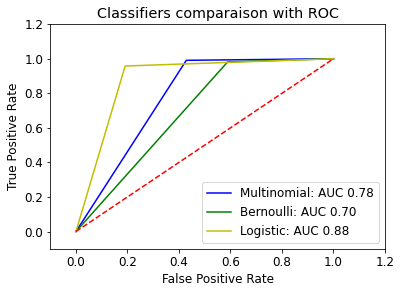

In [19]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
def show_result(y_test,y_pred):
  print("Confusion Matrix       = \n" ,ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot())
  plt.show()
  print("\nAccuracy of Model      = ",accuracy_score(y_test, y_pred))
  print("Precision of Model     = ",precision_score(y_test, y_pred,pos_label='positive'))
  print("Recall of Model        = " ,recall_score(y_test, y_pred,pos_label='positive'))
  print("F1 Score of Model      = " ,f1_score(y_test, y_pred,pos_label='positive'))

#Visualize the accuracy, recall and f1-score for Logistic Regression

Confusion Matrix       = 


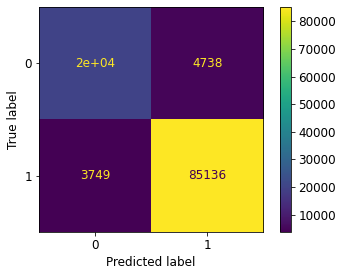


Accuracy of Model      =  0.9253450383962422
Precision of Model     =  0.9472817500055634
Recall of Model        =  0.957821904708331
F1 Score of Model      =  0.9525226701872354


In [21]:
show_result(y_test,prediction['Logistic'])

#Visualize the accuracy, recall and f1-score for Naive Bayes Berrnoulli

Confusion Matrix       = 


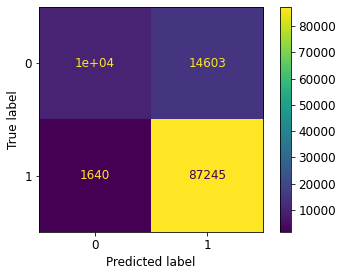


Accuracy of Model      =  0.8571202378543845
Precision of Model     =  0.8566196685256461
Recall of Model        =  0.981549192777184
F1 Score of Model      =  0.914839068226264


In [22]:
show_result(y_test,prediction['Bernoulli'])

#Visualize the accuracy, recall and f1-score for Naive Bayes Multinomial


Confusion Matrix       = 


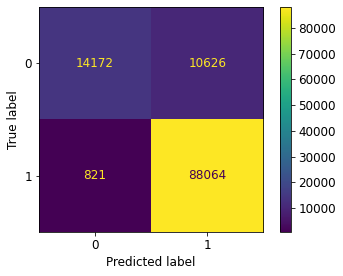


Accuracy of Model      =  0.8993077241100252
Precision of Model     =  0.8923295166683555
Recall of Model        =  0.9907633458963829
F1 Score of Model      =  0.938973743835799


In [23]:
show_result(y_test,prediction['Multinomial'])

#Displaying words depicting the best and worst features
using Logistic Model since it gave us the best results

In [24]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])
feature_coefs.sort_values(by='coefficient')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,coefficient
1053956,worst,-68.939432
1071572,yuck,-59.567104
66606,awful,-40.205019
618309,nasty,-39.589533
457201,horrible,-38.910449
...,...,...
88195,best,33.756209
5077,addictive,35.400563
447069,heaven,38.962940
299458,fantastic,39.648910


In [25]:
feature_coefs.sort_values(by='coefficient').tail(10)

,feature,coefficient
714822,perfect,30.429539
652323,nothing better,30.533090
310844,finally,32.934682
296451,fabulous,33.013034
64350,awesome,33.702356
88195,best,33.756209
5077,addictive,35.400563
447069,heaven,38.962940
299458,fantastic,39.648910
639668,not bitter,54.246869


In [26]:
feature_coefs.sort_values(by='coefficient').head(10)

,feature,coefficient
1053956,worst,-68.939432
1071572,yuck,-59.567104
66606,awful,-40.205019
618309,nasty,-39.589533
457201,horrible,-38.910449
580770,mediocre,-35.559614
60082,at best,-35.172019
650431,not too good,-34.530873
247397,disappointment,-32.425594
894847,terrible,-32.003287


#Testing the sentiments of few reviews


In [27]:
def get_sentiment(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    for mod, clf in model.items():
        result = clf.predict(testTfidf)[0]
        probability = clf.predict_proba(testTfidf)[0]
        print(f"Text Classified by {mod} Model is {result.upper()}: negative prob {round(probability[0],4)}, positive prob {round(probability[1],4)}")

In [28]:
get_sentiment(models, "not so good")

Text Classified by Logistic Model is NEGATIVE: negative prob 1.0, positive prob 0.0
Text Classified by Multinomial Model is NEGATIVE: negative prob 0.7374, positive prob 0.2626
Text Classified by Bernoulli Model is POSITIVE: negative prob 0.0712, positive prob 0.9288


In [29]:
get_sentiment(models, "so good")

Text Classified by Logistic Model is POSITIVE: negative prob 0.0, positive prob 1.0
Text Classified by Multinomial Model is POSITIVE: negative prob 0.0485, positive prob 0.9515
Text Classified by Bernoulli Model is POSITIVE: negative prob 0.0, positive prob 1.0
